In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/clean_data.csv'  # Update with the correct path
data = pd.read_csv(file_path)

# Basic overview
print("Dataset Info:")
print(data.info())

print("\nDataset Preview:")
print(data.head())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    420212 non-null  int64  
 1   Store         420212 non-null  int64  
 2   Dept          420212 non-null  int64  
 3   Date          420212 non-null  object 
 4   Weekly_Sales  420212 non-null  float64
 5   IsHoliday     420212 non-null  bool   
 6   Temperature   420212 non-null  float64
 7   Fuel_Price    420212 non-null  float64
 8   MarkDown1     420212 non-null  float64
 9   MarkDown2     420212 non-null  float64
 10  MarkDown3     420212 non-null  float64
 11  MarkDown4     420212 non-null  float64
 12  MarkDown5     420212 non-null  float64
 13  CPI           420212 non-null  float64
 14  Unemployment  420212 non-null  float64
 15  Type          420212 non-null  object 
 16  Size          420212 non-null  int64  
 17  Super_Bowl    420212 non-null  boo

In [3]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Unnamed: 0          Store           Dept   Weekly_Sales  \
count  420212.000000  420212.000000  420212.000000  420212.000000   
mean   210736.390089      22.195611      44.241309   16033.114591   
std    121715.773081      12.787236      30.508819   22729.492116   
min         0.000000       1.000000       1.000000       0.010000   
25%    105299.750000      11.000000      18.000000    2120.130000   
50%    210775.500000      22.000000      37.000000    7661.700000   
75%    316116.250000      33.000000      74.000000   20271.265000   
max    421569.000000      45.000000      99.000000  693099.360000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  420212.000000  420212.000000  420212.000000  420212.000000   
mean       60.090599       3.360890    2590.323565     878.905242   
std        18.447857       0.458519    6053.415601    5076.928566   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        4

Exploratory Data Analysis (EDA)

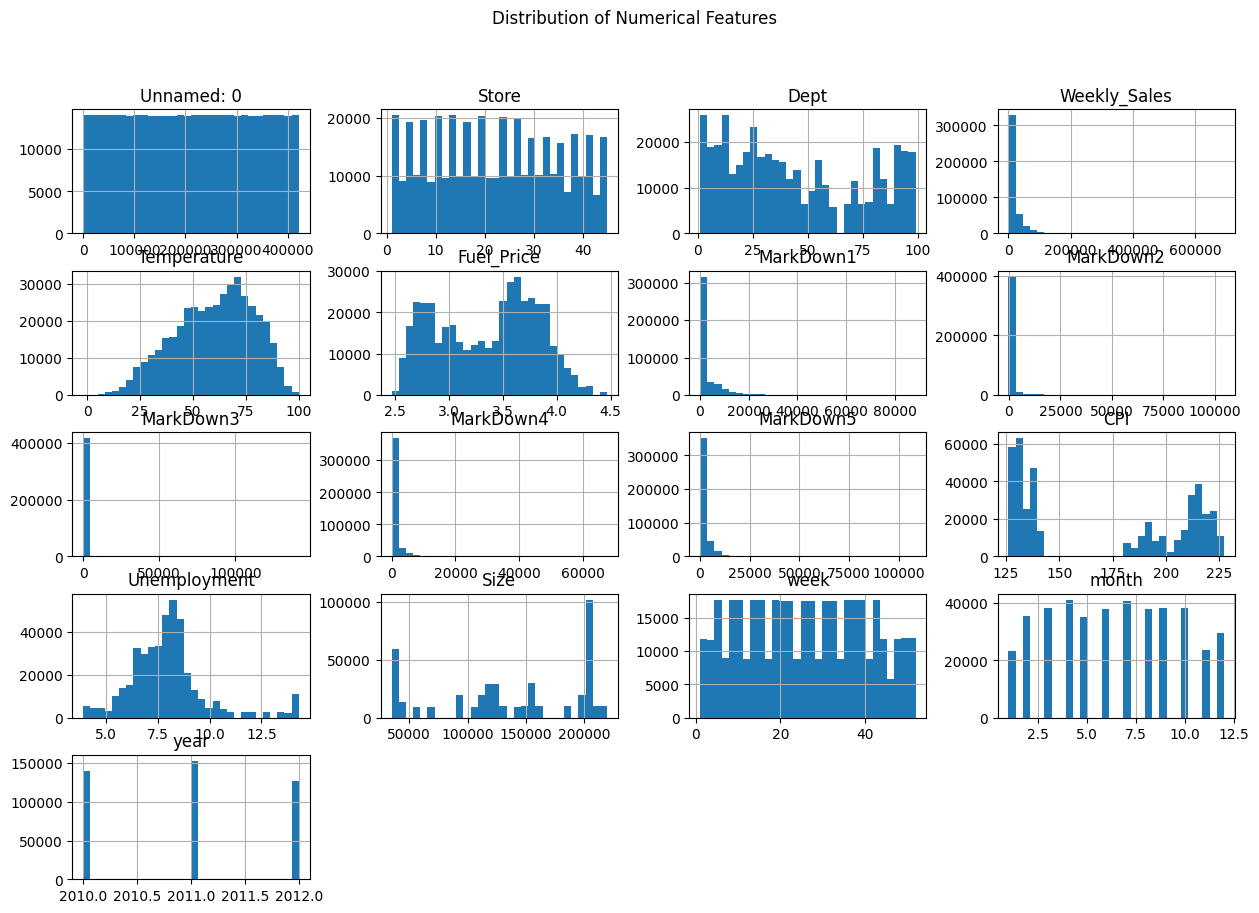

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()




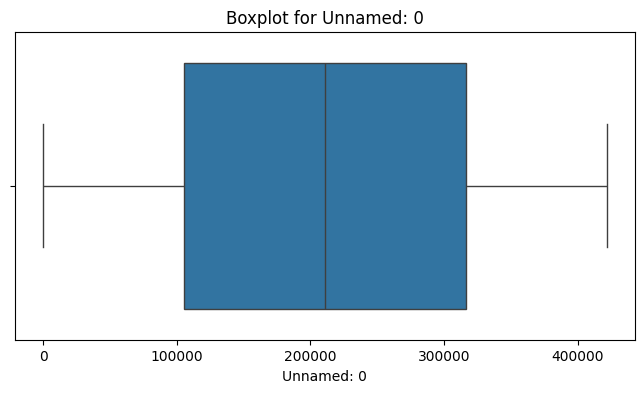

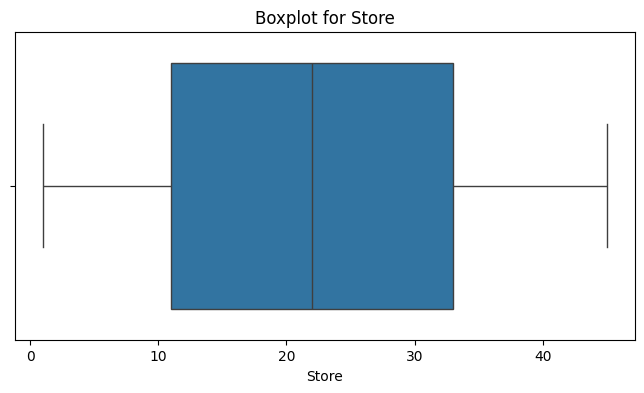

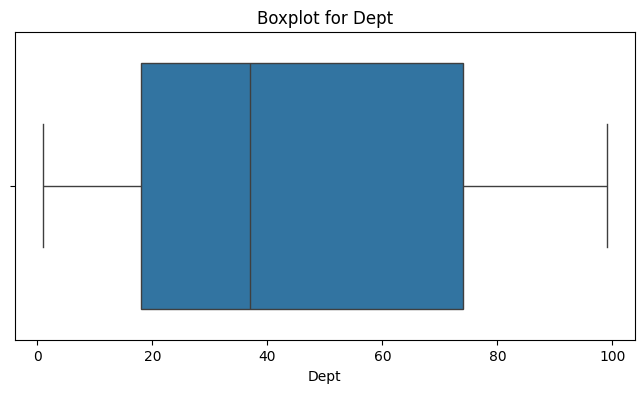

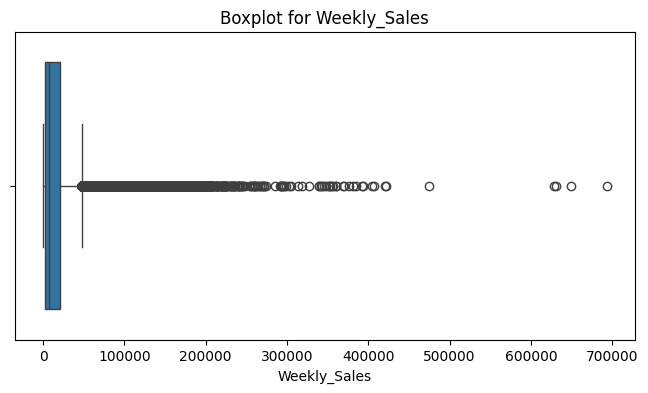

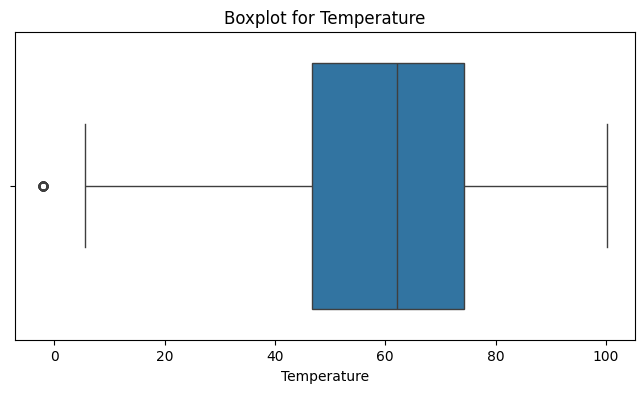

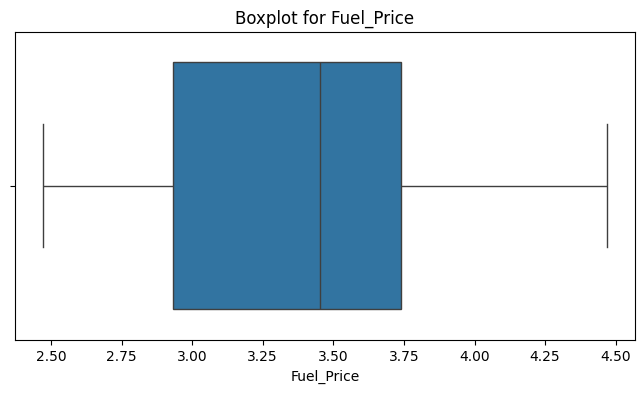

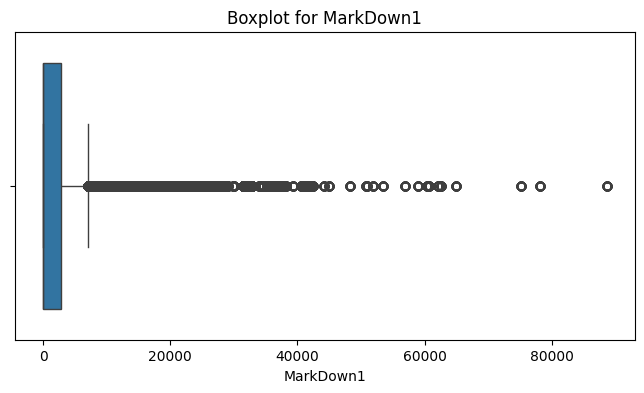

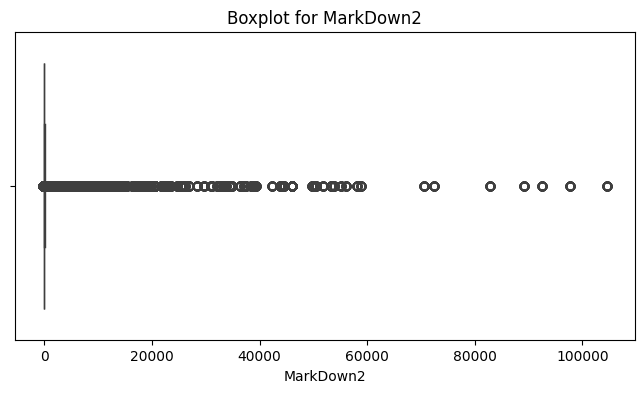

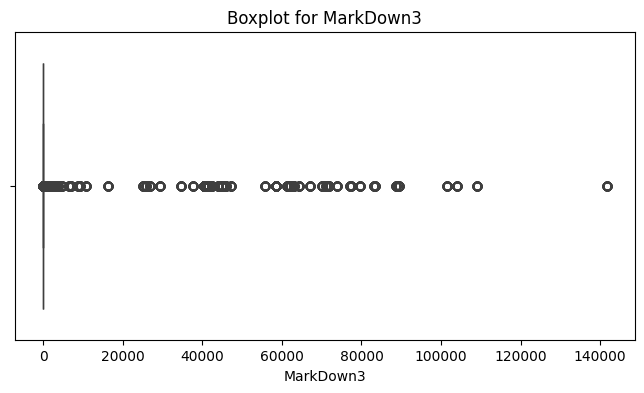

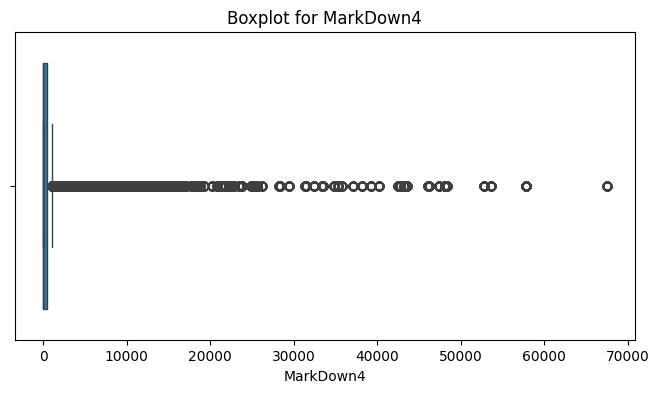

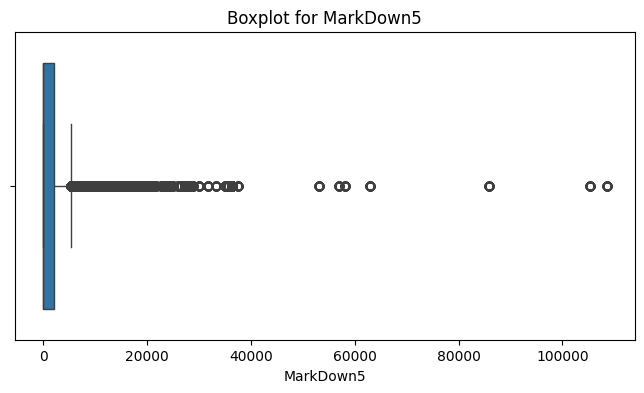

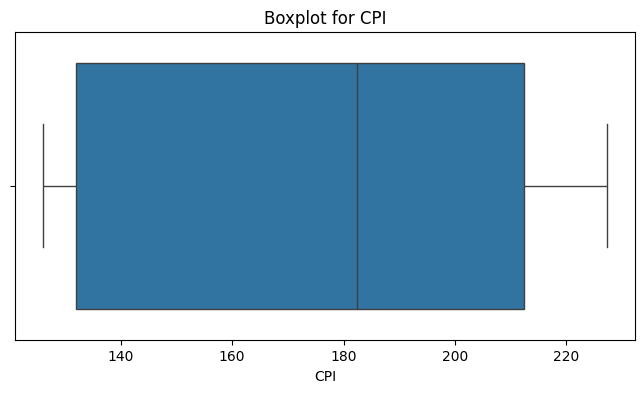

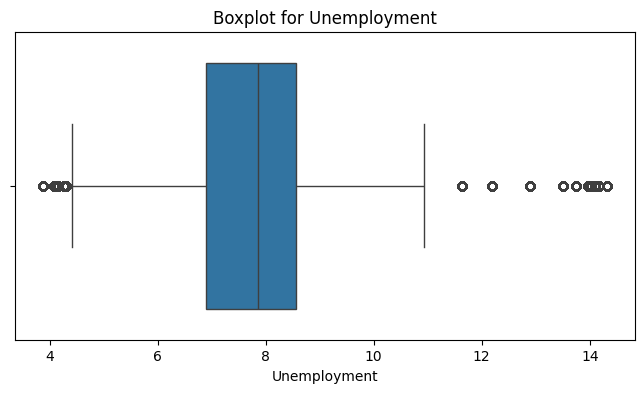

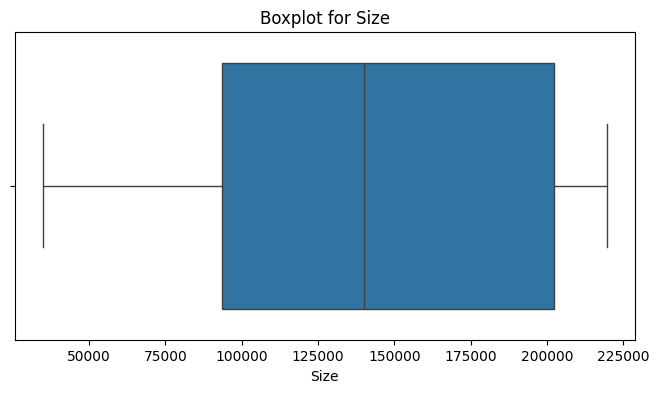

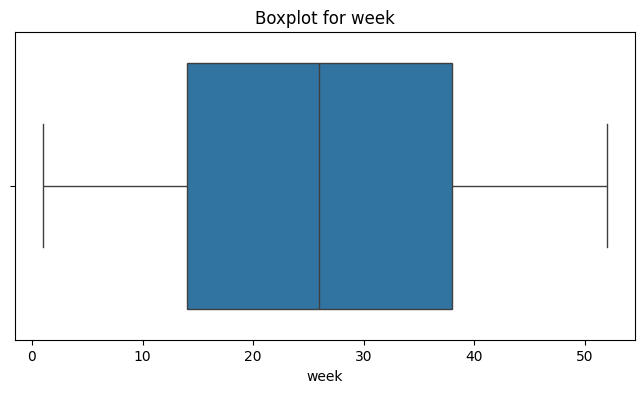

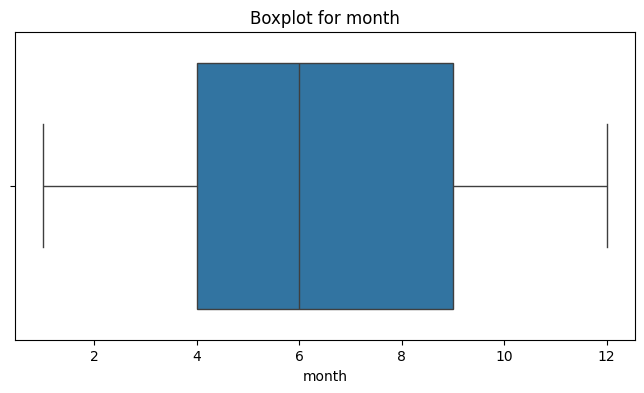

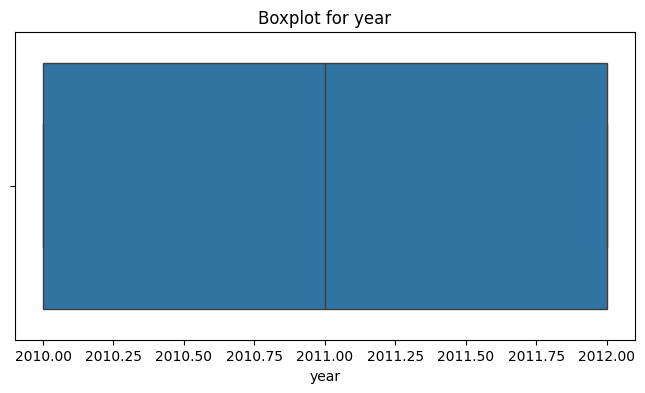

In [5]:
# Boxplots for numerical features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()



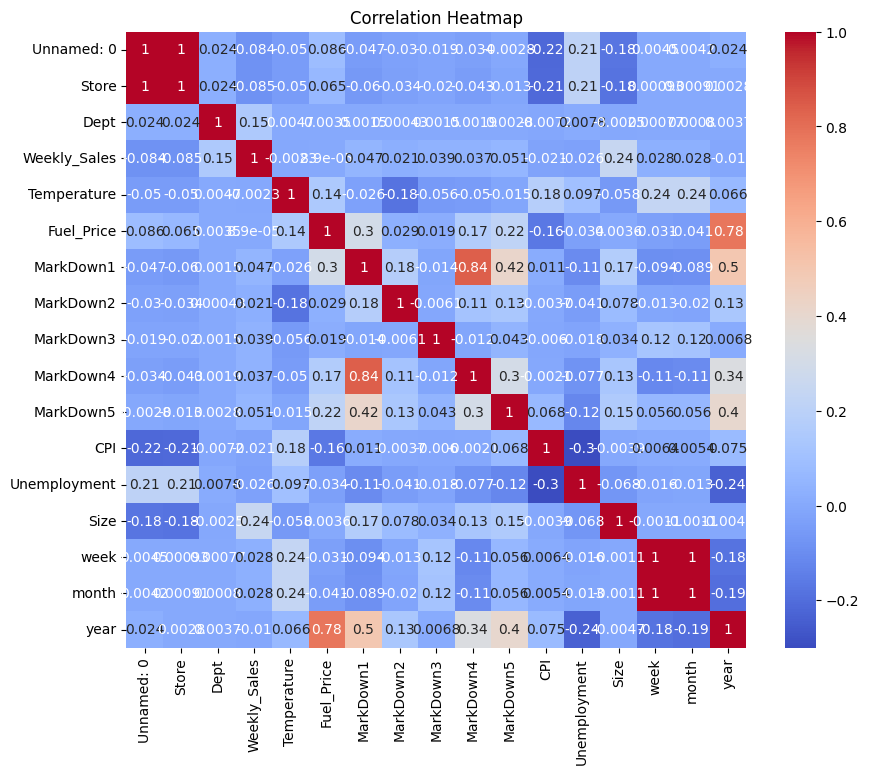

In [6]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Data Preprocessing

In [7]:
# Check missing values
print("Missing Values:")
print(data.isnull().sum())

# Handle missing values (example: mean/mode imputation)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Detect and handle outliers using IQR
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


Missing Values:
Unnamed: 0      0
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64


<ipython-input-7-560fcf042b07>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-7-560fcf042b07>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Preview processed data
print("\nProcessed Data Preview:")
print(data.head())



Processed Data Preview:
   Unnamed: 0     Store      Dept      Date  Weekly_Sales  IsHoliday  \
0   -1.683598 -1.625637 -1.414380 -1.690978      1.280497      False   
2   -1.683582 -1.625637 -1.346526 -1.690978      0.284689      False   
3   -1.683574 -1.625637 -1.312599 -1.690978      2.618661      False   
4   -1.683566 -1.625637 -1.278672 -1.690978      1.930891      False   
5   -1.683558 -1.625637 -1.244745 -1.690978     -0.426803      False   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  ...  Unemployment      Type  \
0    -0.931453     -1.3273        0.0        0.0  ...      0.127547 -0.903725   
2    -0.931453     -1.3273        0.0        0.0  ...      0.127547 -0.903725   
3    -0.931453     -1.3273        0.0        0.0  ...      0.127547 -0.903725   
4    -0.931453     -1.3273        0.0        0.0  ...      0.127547 -0.903725   
5    -0.931453     -1.3273        0.0        0.0  ...      0.127547 -0.903725   

       Size  Super_Bowl  Labor_Day  Thanksgiving  Chris

Split Dataset

In [9]:
# Define features (X) and target (y)
X = data.drop(columns=['Weekly_Sales'])  # Drop the target column from features
y = data['Weekly_Sales']  # Target variable

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (157234, 23)
Testing Set Shape: (67387, 23)


Statistical Testing

In [10]:
from scipy.stats import pearsonr

# Select numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Test correlations with the target variable
print("Pearson Correlation with Weekly_Sales:")
for col in numerical_columns:
    correlation, p_value = pearsonr(X[col], y)
    print(f"{col}: Correlation={correlation:.4f}, P-value={p_value:.4f}")


Pearson Correlation with Weekly_Sales:
Unnamed: 0: Correlation=-0.0458, P-value=0.0000
Store: Correlation=-0.0464, P-value=0.0000
Dept: Correlation=0.0002, P-value=0.9217
Date: Correlation=-0.0139, P-value=0.0000
Temperature: Correlation=-0.0004, P-value=0.8532
Fuel_Price: Correlation=0.0017, P-value=0.4070
MarkDown1: Correlation=nan, P-value=nan
MarkDown2: Correlation=nan, P-value=nan
MarkDown3: Correlation=nan, P-value=nan
MarkDown4: Correlation=nan, P-value=nan
MarkDown5: Correlation=nan, P-value=nan
CPI: Correlation=-0.0407, P-value=0.0000
Unemployment: Correlation=-0.0144, P-value=0.0000
Type: Correlation=-0.1622, P-value=0.0000
Size: Correlation=0.2250, P-value=0.0000
week: Correlation=0.0177, P-value=0.0000
month: Correlation=0.0183, P-value=0.0000
year: Correlation=-0.0236, P-value=0.0000


<ipython-input-10-08377b6cb11e>:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(X[col], y)


In [11]:
from scipy.stats import ttest_ind

# Group by a binary categorical variable
group1 = y[X['IsHoliday'] == 0]  # Non-holiday sales
group2 = y[X['IsHoliday'] == 1]  # Holiday sales

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-test for IsHoliday: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")


T-test for IsHoliday: t-statistic=-2.0730, p-value=0.0382


In [12]:
from scipy.stats import f_oneway

# Group by categorical variable
groups = [y[X['Type'] == value] for value in X['Type'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA for Type: F-statistic={f_stat:.4f}, p-value={p_value:.4f}")


ANOVA for Type: F-statistic=3057.2858, p-value=0.0000


In [13]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(X['IsHoliday'], X['Type'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test: chi2={chi2:.4f}, p-value={p_value:.4f}, degrees of freedom={dof}")


Chi-square Test: chi2=1.0055, p-value=0.6049, degrees of freedom=2


In [14]:
from scipy.stats import shapiro

# Test normality of the target variable
stat, p_value = shapiro(y)
print(f"Shapiro-Wilk Test for Normality: Statistic={stat:.4f}, P-value={p_value:.4f}")


from scipy.stats import levene

# Test equal variance for holiday and non-holiday sales
stat, p_value = levene(group1, group2)
print(f"Levene Test for Homoscedasticity: Statistic={stat:.4f}, P-value={p_value:.4f}")


Shapiro-Wilk Test for Normality: Statistic=0.8358, P-value=0.0000
Levene Test for Homoscedasticity: Statistic=6.5592, P-value=0.0104


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 224621.
  res = hypotest_fun_out(*samples, **kwds)


 Model Building

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression Model (replace with your model choice)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance: MSE={mse}, R²={r2}")


Model Performance: MSE=0.9524812473201297, R²=0.054290360908627155


 Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression: MSE={mse_lr:.4f}, R²={r2_lr:.4f}")


Linear Regression: MSE=0.9525, R²=0.0543


Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression: MSE={mse_dt:.4f}, R²={r2_dt:.4f}")


Decision Tree Regression: MSE=0.0549, R²=0.9455


 Gradient Boosting Regression

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression: MSE={mse_gb:.4f}, R²={r2_gb:.4f}")


Gradient Boosting Regression: MSE=0.3570, R²=0.6455


Compare Model Performance

In [19]:
# Create a performance summary
performance = {
    "Model": ["Linear Regression", "Decision Tree","Gradient Boosting" ],
    "MSE": [mse_lr, mse_dt, mse_gb],
    "R²": [r2_lr, r2_dt, r2_gb]
}

import pandas as pd
performance_df = pd.DataFrame(performance)
print(performance_df)


               Model       MSE        R²
0  Linear Regression  0.952481  0.054290
1      Decision Tree  0.054853  0.945537
2  Gradient Boosting  0.357004  0.645534


Visualize Predictions

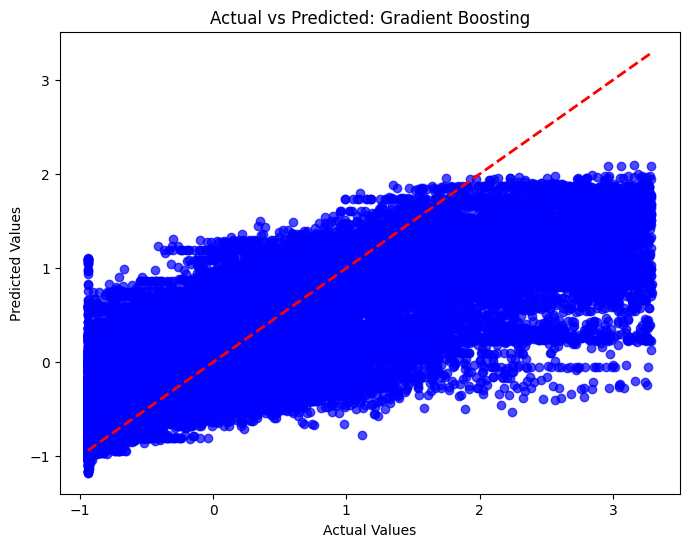

In [20]:
import matplotlib.pyplot as plt

# Actual vs Predicted for Gradient Boosting (best model)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted: Gradient Boosting")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


For Classification Tasks

In [23]:
# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Initialize the model
# log_reg = LogisticRegression(random_state=42)

# # Train the model
# log_reg.fit(X_train, y_train)

# # Predict on the test set
# y_pred_log = log_reg.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_log)
# print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# # Confusion Matrix and Classification Report
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_log))
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_log))

# Define threshold for classification (e.g., median of Weekly_Sales)
threshold = y_train.median()

# Convert target variable into binary categories
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

print(f"Classes in Training Set: {y_train_class.unique()}")
print(f"Classes in Test Set: {y_test_class.unique()}")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train_class)

# Predict on the test set
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_log))



Classes in Training Set: [0 1]
Classes in Test Set: [1 0]
Logistic Regression Accuracy: 0.5863
Confusion Matrix:
[[17785 15818]
 [12061 21723]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.53      0.56     33603
           1       0.58      0.64      0.61     33784

    accuracy                           0.59     67387
   macro avg       0.59      0.59      0.58     67387
weighted avg       0.59      0.59      0.58     67387



Feature Importances (Decision Tree or Gradient Boosting)

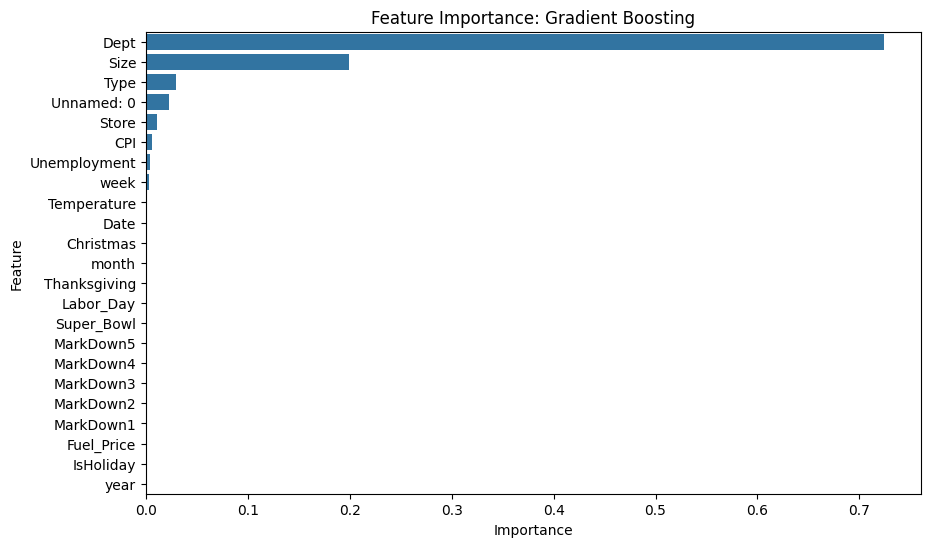

In [24]:
import seaborn as sns

# Feature importances for Gradient Boosting
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance: Gradient Boosting')
plt.show()
